In [38]:
np.array([3,3**2]).shape

(2,)

In [2]:
%run dataset.py

Files already downloaded and verified
Files already downloaded and verified


In [18]:
all_data = train_dataset.data # np shape (50000, 32, 32, 3)
all_labels = np.array(train_dataset.targets)

In [19]:
user_dataidxs = [np.array(i).astype(int) for i in user_groups.values()]

In [27]:
useridx = []
for i in user_groups.keys():
    useridx += list(user_groups[i])
len(set(useridx))

50000

In [20]:
user_labels = [all_labels[subset] for subset in user_dataidxs]

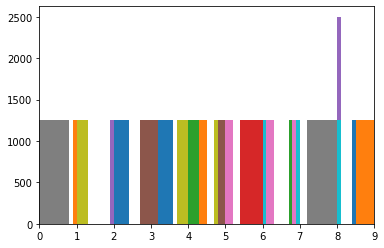

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
for label in user_labels:
    plt.hist(label)
plt.xlim([0,9])
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy

__all__ = ['CifarNet']

class CifarNet(nn.Module):
    '''
    From https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py
    '''
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = CifarNet()
sd = net.state_dict()
sd['conv1.weight.var'] = deepcopy(sd['conv1.weight'])

net.load_state_dict(sd)

<All keys matched successfully>

In [29]:
sd['conv1.weight'].sum()

tensor(-1.4424)

In [18]:
id(net.conv1.weight)

47177682893344

In [28]:
for key, value in net.named_parameters():
    print(key)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [7]:
import numpy as np

In [35]:
np.array([4,5,2,6,-9.]).mean()

1.6

In [11]:
np.var(np.array([4,5,2,6,9])+2.8)

5.360000000000001

In [40]:
a = torch.tensor([1,2,3,4])

In [42]:
b = a.numpy()
c = deepcopy(a.numpy())

In [43]:
a[0]=10

In [44]:
b

array([10,  2,  3,  4])

In [51]:
import pickle
pickle.dump( [sd]*2, open( "save.p", "wb" ) )

In [52]:
haha = pickle.load( open( "save.p", "rb" ) )

In [53]:
haha

[OrderedDict([('conv1.weight',
               tensor([[[[ 2.1815e-03, -1.9242e-03, -1.1506e-01, -7.0681e-02, -6.4131e-02],
                         [-9.6473e-02,  6.9310e-02,  2.7635e-03,  2.3085e-02, -6.6296e-02],
                         [ 4.5536e-02,  8.2725e-02, -4.3258e-02,  8.4144e-02, -9.7182e-02],
                         [ 6.0590e-02, -2.9409e-02,  1.2406e-02,  5.2530e-02,  2.4552e-02],
                         [-1.1334e-01,  9.2765e-02,  7.2373e-02,  8.8784e-02, -3.0385e-03]],
               
                        [[ 2.3473e-02,  1.0556e-02, -4.6851e-02, -6.8477e-02, -6.7308e-02],
                         [-4.0873e-02,  3.4461e-02, -8.7672e-03, -5.6045e-02,  1.0103e-01],
                         [-2.3018e-02, -1.0619e-01, -6.4099e-02,  2.2704e-02,  6.2303e-02],
                         [-6.5488e-02, -2.7706e-02, -8.8783e-03,  6.7945e-02, -7.9687e-02],
                         [-6.1825e-02,  2.6381e-02,  9.8112e-02,  7.4725e-02,  5.0758e-02]],
               
               